In [7]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
df = pd.read_csv('ai_job_market_insights.csv')

In [9]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


# Let's check if data is correct

In [4]:
df.isna().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

# Count and Plot Job Titles

In [23]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [24]:
df.Job_Title.value_counts()

Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

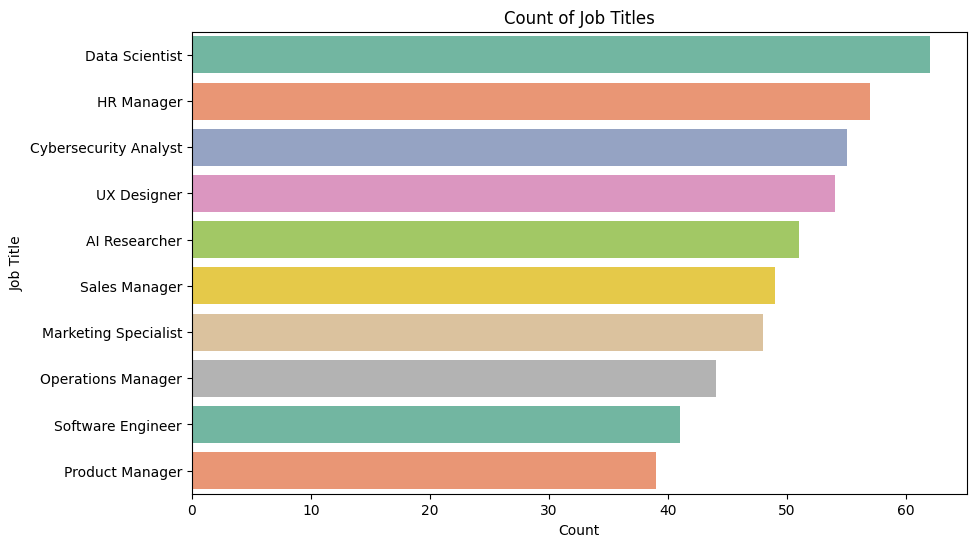

In [81]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, 
              y='Job_Title', 
              order=df['Job_Title'].value_counts().index, # Same order of title as df
              palette='Set2')

plt.title('Count of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
 

plt.show()

# Count and Plot Industries

In [25]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [22]:
df.Industry.value_counts()

Industry
Manufacturing         58
Education             57
Technology            56
Telecommunications    53
Finance               53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

Text(0, 0.5, 'Industry')

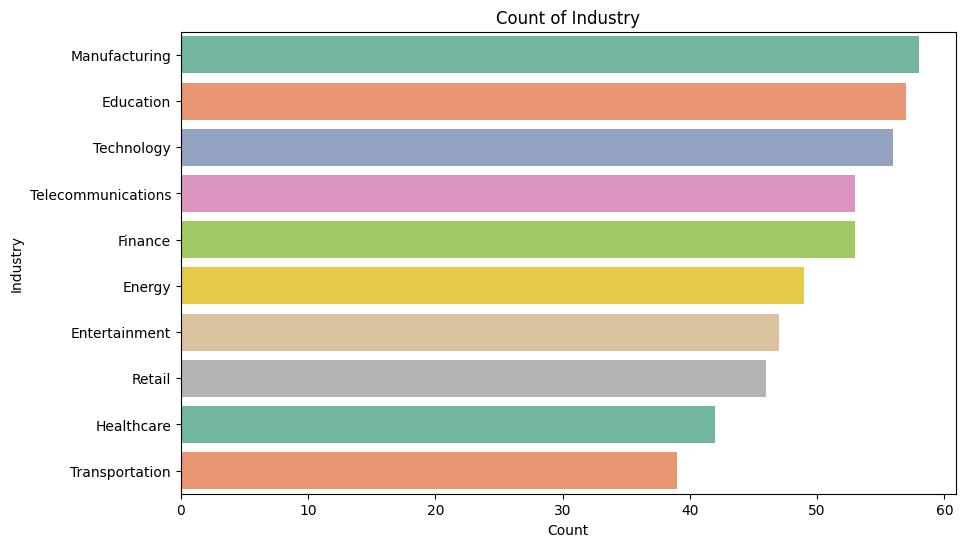

In [80]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, 
              y='Industry',
              order=df['Industry'].value_counts().index,
             palette='Set2')

plt.title('Count of Industry')
plt.xlabel('Count')
plt.ylabel('Industry')

# Distribution of Companty Sizes

In [27]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [30]:
df.Company_Size.unique()

array(['Small', 'Large', 'Medium'], dtype=object)

<Axes: title={'center': 'Distribution of  Company Size'}, ylabel='count'>

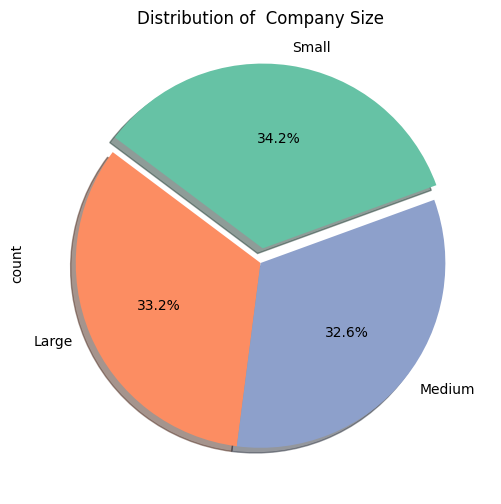

In [79]:
colors = plt.get_cmap('Set2').colors

df['Company_Size'].value_counts().plot(kind='pie', 
                                       startangle=20, 
                                       autopct='%1.1f%%', 
                                       title='Distribution of  Company Size',
                                       explode=(0.08, 0, 0),
                                       shadow=True,
                                       colors=colors,
                                       figsize=(10, 6))

# Distribution of Job Title by Company Sizes

In [62]:
df.groupby('Company_Size')['Job_Title'].value_counts().unstack()

Job_Title,AI Researcher,Cybersecurity Analyst,Data Scientist,HR Manager,Marketing Specialist,Operations Manager,Product Manager,Sales Manager,Software Engineer,UX Designer
Company_Size,,,,,,,,,,
Large,16,20,23,20,15,13,16,16,12,15
Medium,21,16,17,20,20,12,11,16,13,17
Small,14,19,22,17,13,19,12,17,16,22


In [88]:
title_count = df.groupby(['Job_Title', 'Company_Size']).size().unstack()
title_count

Company_Size,Large,Medium,Small
Job_Title,,,
AI Researcher,16,21,14
Cybersecurity Analyst,20,16,19
Data Scientist,23,17,22
HR Manager,20,20,17
Marketing Specialist,15,20,13
Operations Manager,13,12,19
Product Manager,16,11,12
Sales Manager,16,16,17
Software Engineer,12,13,16


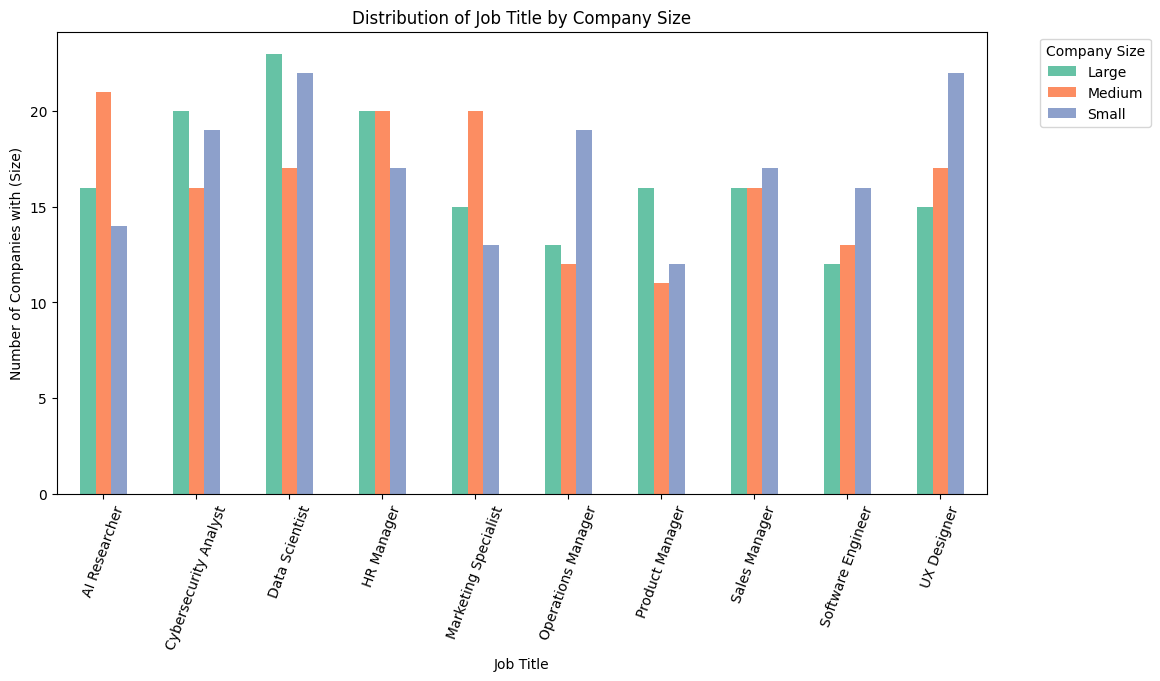

In [91]:
palette = sns.color_palette("Set2")
title_count.plot(kind='bar', figsize=(12, 6), color=palette)

plt.title('Distribution of Job Title by Company Size')
plt.xlabel('Job Title')
plt.ylabel('Number of Companies with (Size)')
plt.xticks(rotation=70)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribution of Industry by Company Sizes

In [94]:
df.groupby('Industry')['Job_Title'].value_counts().unstack()

Job_Title,AI Researcher,Cybersecurity Analyst,Data Scientist,HR Manager,Marketing Specialist,Operations Manager,Product Manager,Sales Manager,Software Engineer,UX Designer
Industry,,,,,,,,,,
Education,7,7,8,6,4,4,5,4,2,10
Energy,5,5,5,7,6,5,4,5,1,6
Entertainment,3,8,8,6,3,6,3,3,3,4
Finance,7,2,4,11,6,4,7,6,3,3
Healthcare,2,8,3,2,5,6,3,4,4,5
Manufacturing,6,6,6,6,6,3,3,9,6,7
Retail,6,3,3,6,9,1,1,5,5,7
Technology,6,6,10,5,5,8,4,3,5,4
Telecommunications,2,7,10,6,3,3,5,5,7,5


In [100]:
industry_count = df.groupby(['Industry', 'Company_Size']).size().unstack()
industry_count

Company_Size,Large,Medium,Small
Industry,,,
Education,16,22,19
Energy,16,15,18
Entertainment,14,13,20
Finance,15,23,15
Healthcare,20,10,12
Manufacturing,20,17,21
Retail,14,19,13
Technology,22,17,17
Telecommunications,16,16,21


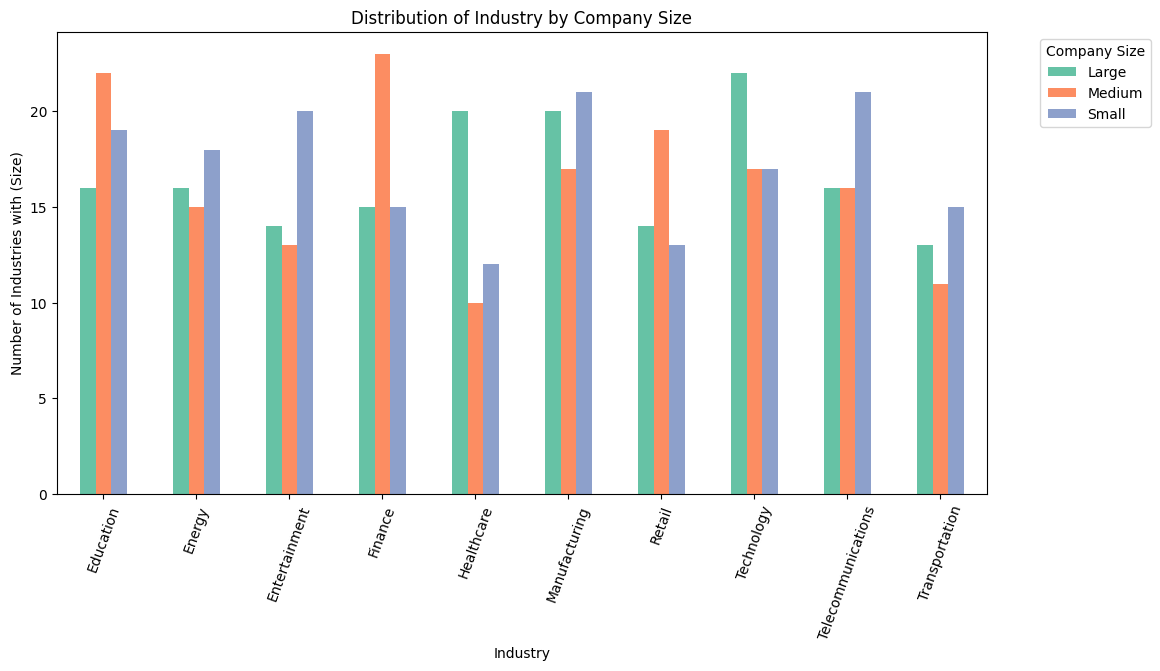

In [102]:
palette = sns.color_palette("Set2")
industry_count.plot(kind='bar', figsize=(12, 6), color=palette)

plt.title('Distribution of Industry by Company Size')
plt.xlabel('Industry')
plt.ylabel('Number of Industries with (Size)')
plt.xticks(rotation=70)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribution of Location by Company Sizes

In [106]:
df.groupby("Company_Size")["Location"].value_counts().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Company_Size,,,,,,,,,,
Large,18,13,14,19,15,18,17,14,19,19
Medium,19,17,15,11,14,19,20,20,14,14
Small,11,21,17,19,17,25,17,18,18,8


In [116]:
location_count = df.groupby(['Location', 'Company_Size']).size().unstack()
location_count

Company_Size,Large,Medium,Small
Location,,,
Berlin,18,19,11
Dubai,13,17,21
London,14,15,17
New York,19,11,19
Paris,15,14,17
San Francisco,18,19,25
Singapore,17,20,17
Sydney,14,20,18
Tokyo,19,14,18


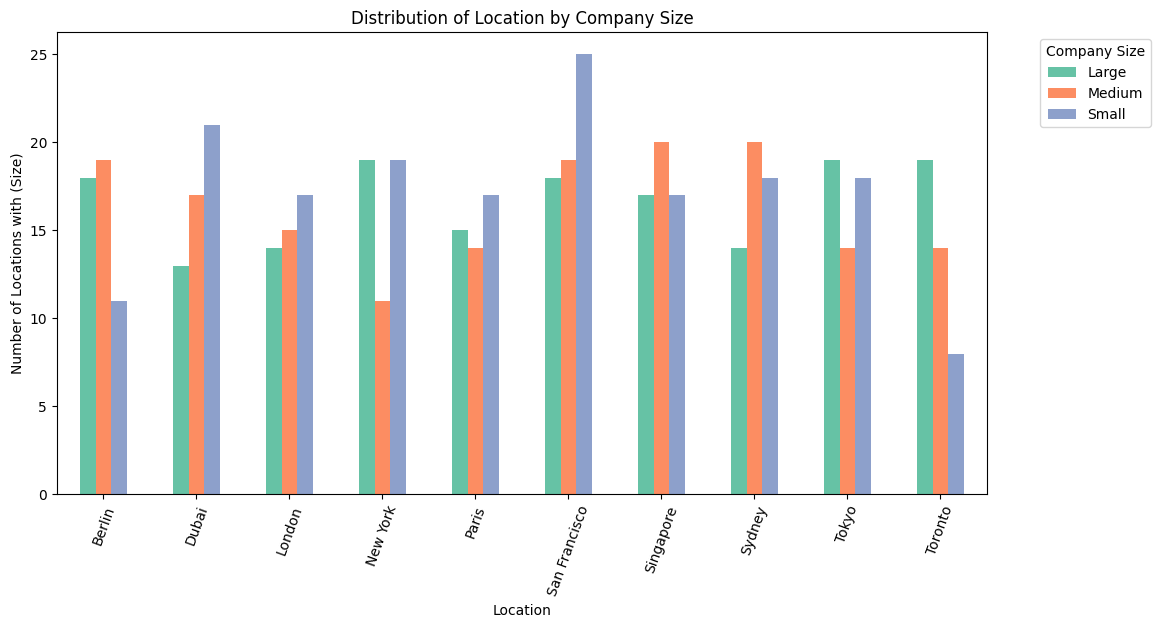

In [117]:
palette = sns.color_palette("Set2")
location_count.plot(kind='bar', figsize=(12, 6), color=palette)

plt.title('Distribution of Location by Company Size')
plt.xlabel('Location')
plt.ylabel('Number of Locations with (Size)')
plt.xticks(rotation=70)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribution of Job Title by Location

In [120]:
df.groupby("Job_Title")["Location"].value_counts().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Job_Title,,,,,,,,,,
AI Researcher,2,3,3,6,2,10,8,5,5,7
Cybersecurity Analyst,7,9,8,6,4,4,3,7,3,4
Data Scientist,7,6,5,8,4,6,5,8,8,5
HR Manager,5,4,8,6,8,7,6,3,5,5
Marketing Specialist,6,5,4,2,6,9,6,3,6,1
Operations Manager,7,6,5,4,2,7,4,4,4,1
Product Manager,4,2,3,2,4,6,3,5,5,5
Sales Manager,5,3,6,3,5,5,7,5,3,7
Software Engineer,2,5,3,5,4,3,6,6,5,2


In [123]:
job_title_count = df.groupby(["Job_Title", "Location"]).size().unstack()
job_title_count

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Job_Title,,,,,,,,,,
AI Researcher,2,3,3,6,2,10,8,5,5,7
Cybersecurity Analyst,7,9,8,6,4,4,3,7,3,4
Data Scientist,7,6,5,8,4,6,5,8,8,5
HR Manager,5,4,8,6,8,7,6,3,5,5
Marketing Specialist,6,5,4,2,6,9,6,3,6,1
Operations Manager,7,6,5,4,2,7,4,4,4,1
Product Manager,4,2,3,2,4,6,3,5,5,5
Sales Manager,5,3,6,3,5,5,7,5,3,7
Software Engineer,2,5,3,5,4,3,6,6,5,2


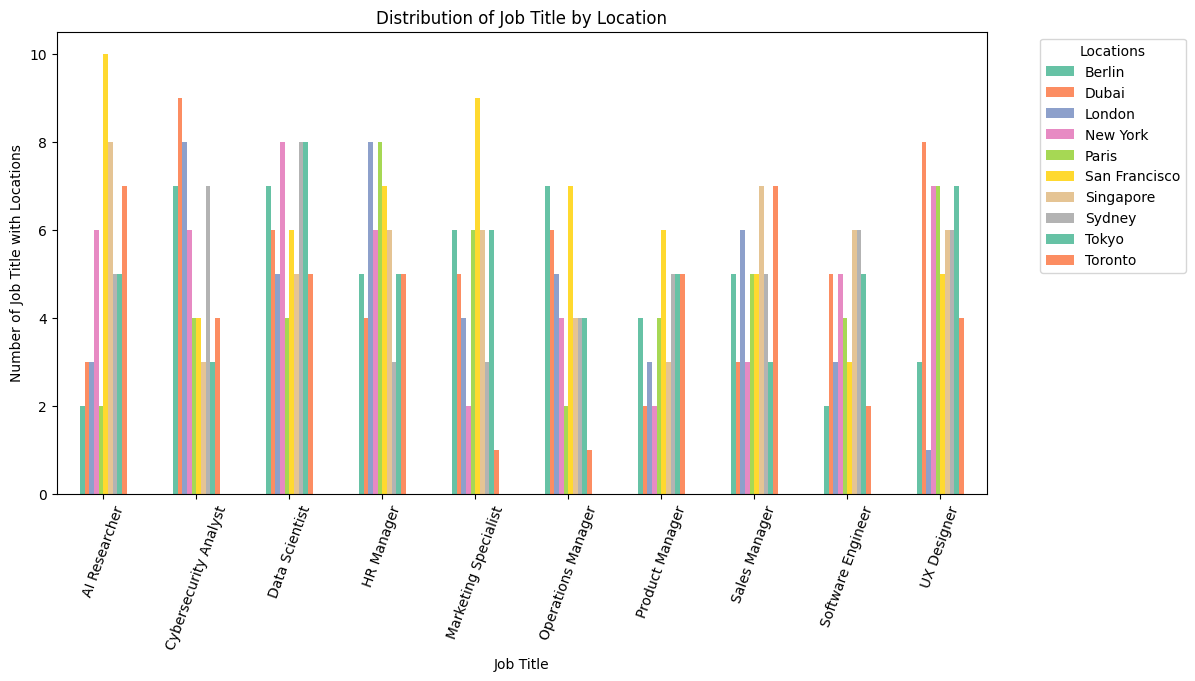

In [133]:
palette = sns.color_palette("Set2")
job_title_count.plot(kind='bar', figsize=(12, 6), color=palette)

plt.title('Distribution of Job Title by Location')
plt.xlabel('Job Title')
plt.ylabel('Number of Job Title with Locations')
plt.xticks(rotation=70)
plt.legend(title='Locations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribution of Industry by Location

In [128]:
df.groupby("Industry")["Location"].value_counts().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Industry,,,,,,,,,,
Education,6,4,6,7,5,6,6,5,7,5
Energy,6,5,3,6,3,6,9,4,3,4
Entertainment,6,3,3,5,4,3,9,5,7,2
Finance,1,4,4,3,5,12,6,3,8,7
Healthcare,5,7,4,1,9,4,2,6,3,1
Manufacturing,4,5,8,7,8,6,4,8,6,2
Retail,5,5,4,5,2,6,3,7,5,4
Technology,5,5,5,6,4,8,7,5,5,6
Telecommunications,8,7,6,7,1,5,3,6,5,5


In [130]:
industry_count = df.groupby(["Industry", "Location"]).size().unstack()
industry_count

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Industry,,,,,,,,,,
Education,6,4,6,7,5,6,6,5,7,5
Energy,6,5,3,6,3,6,9,4,3,4
Entertainment,6,3,3,5,4,3,9,5,7,2
Finance,1,4,4,3,5,12,6,3,8,7
Healthcare,5,7,4,1,9,4,2,6,3,1
Manufacturing,4,5,8,7,8,6,4,8,6,2
Retail,5,5,4,5,2,6,3,7,5,4
Technology,5,5,5,6,4,8,7,5,5,6
Telecommunications,8,7,6,7,1,5,3,6,5,5


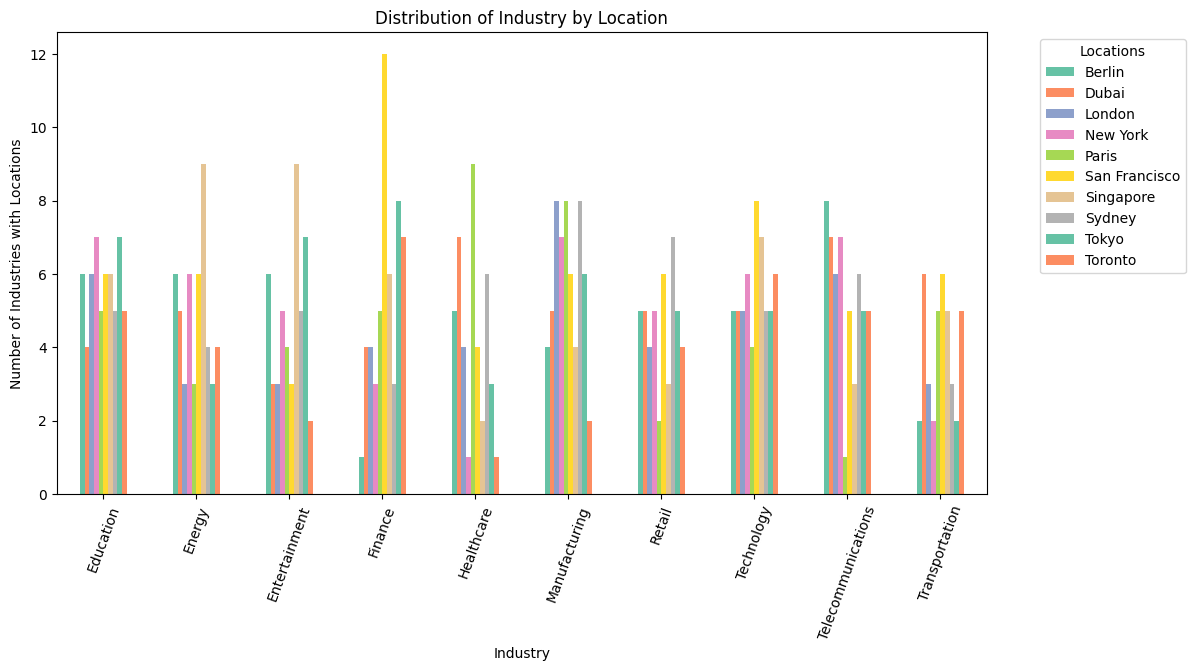

In [134]:
palette = sns.color_palette("Set2")
industry_count.plot(kind='bar', figsize=(12, 6), color=palette)

plt.title('Distribution of Industry by Location')
plt.xlabel('Industry')
plt.ylabel('Number of Industries with Locations')
plt.xticks(rotation=70)
plt.legend(title='Locations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribution of AI Adoption Levels

In [137]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [139]:
df.AI_Adoption_Level.unique()

array(['Medium', 'Low', 'High'], dtype=object)

<Axes: title={'center': 'Distribution of AI Adoption Level'}, ylabel='count'>

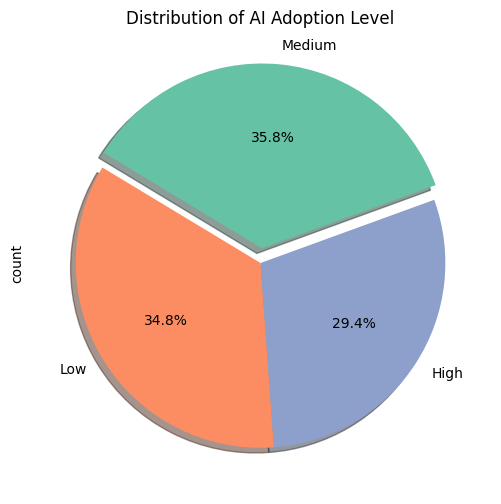

In [142]:
colors = plt.get_cmap('Set2').colors

df['AI_Adoption_Level'].value_counts().plot(kind='pie', 
                                       startangle=20, 
                                       autopct='%1.1f%%', 
                                       title='Distribution of AI Adoption Level',
                                       explode=(0.08, 0, 0),
                                       shadow=True,
                                       colors=colors,
                                       figsize=(10, 6))

# AI Adoption Level Accross Different Locations

In [171]:
df.groupby('AI_Adoption_Level')['Location'].value_counts().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
AI_Adoption_Level,,,,,,,,,,
High,8,16,14,19,11,23,16,15,13,12
Low,23,11,13,14,22,16,18,21,22,14
Medium,17,24,19,16,13,23,20,16,16,15


In [152]:
level_count = df.groupby(['AI_Adoption_Level', 'Location']).size().unstack()
level_count

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
AI_Adoption_Level,,,,,,,,,,
High,8,16,14,19,11,23,16,15,13,12
Low,23,11,13,14,22,16,18,21,22,14
Medium,17,24,19,16,13,23,20,16,16,15


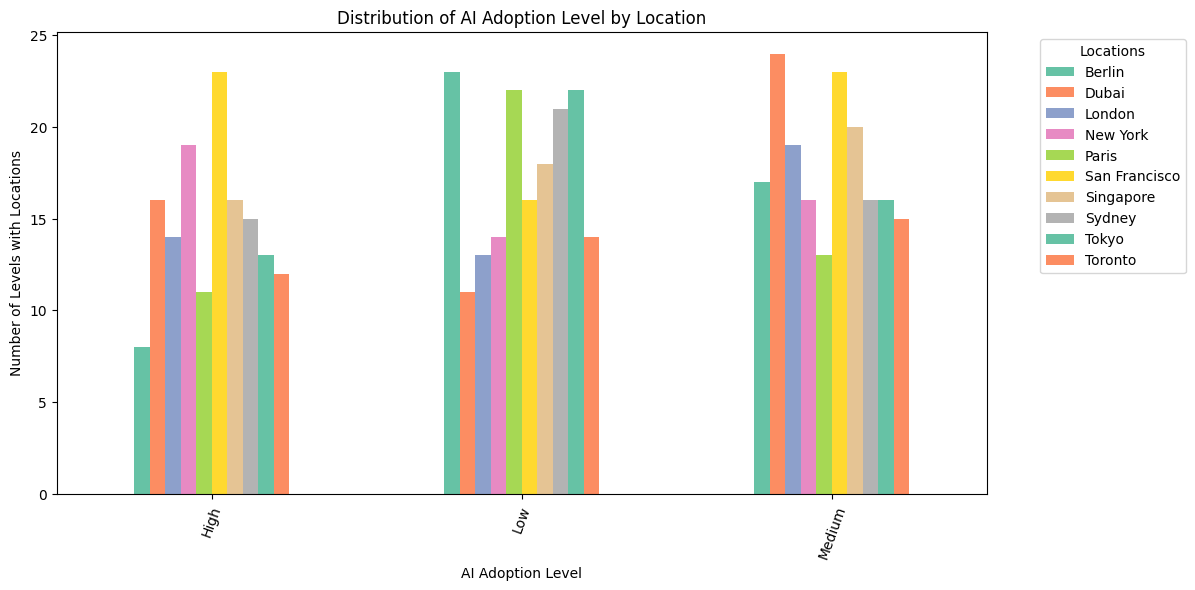

In [156]:
palette = sns.color_palette("Set2")
level_count.plot(kind='bar', figsize=(12, 6), color=palette)

plt.title('Distribution of AI Adoption Level by Location')
plt.xlabel('AI Adoption Level')
plt.ylabel('Number of Levels with Locations')
plt.xticks(rotation=70)
plt.legend(title='Locations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# AI Adoption Level Across Different Industries

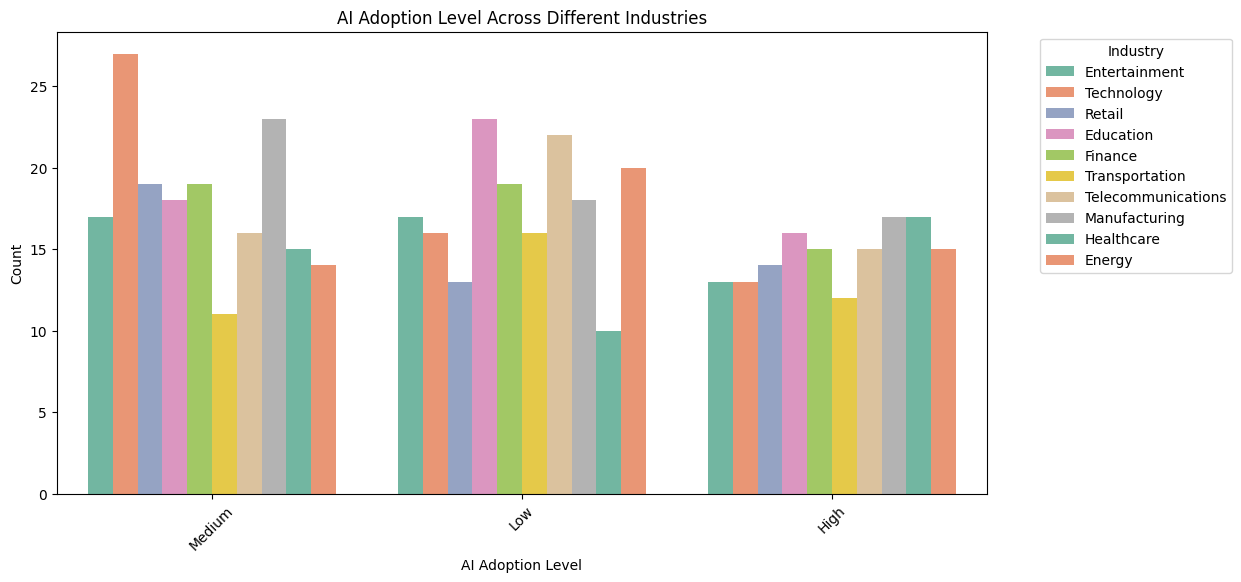

In [161]:
colors = plt.get_cmap('Set2').colors

plt.figure(figsize=(12, 6))
sns.countplot(data=df, 
              x='AI_Adoption_Level', 
              hue='Industry', 
              palette=colors)
plt.title('AI Adoption Level Across Different Industries')
plt.xlabel('AI Adoption Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# AI Adoption Level Across Different Job Titles

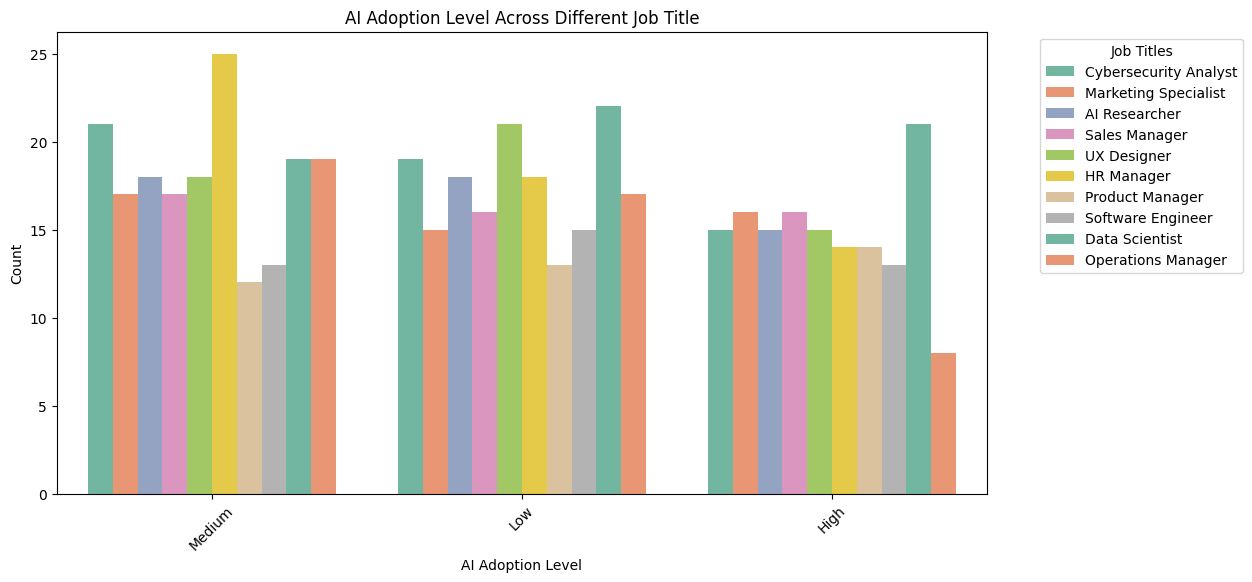

In [165]:
colors = plt.get_cmap('Set2').colors

plt.figure(figsize=(12, 6))
sns.countplot(data=df, 
              x='AI_Adoption_Level', 
              hue='Job_Title', 
              palette=colors)
plt.title('AI Adoption Level Across Different Job Title')
plt.xlabel('AI Adoption Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Job Titles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# AI Adoption Level Across Different Job Titles

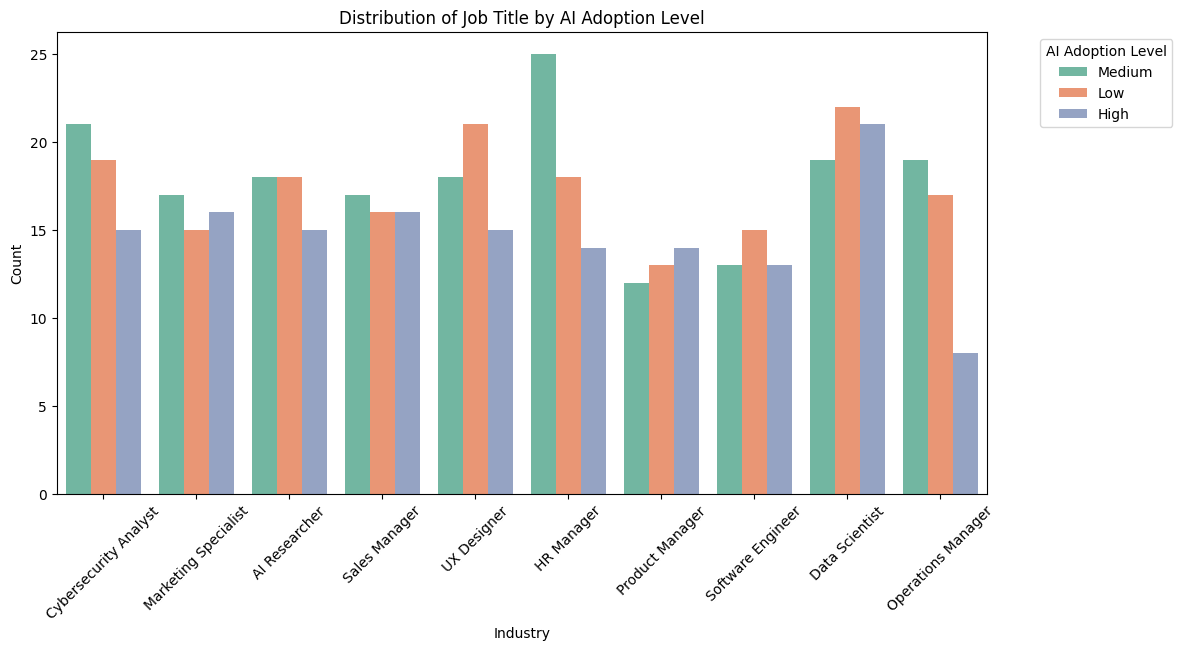

In [13]:
colors = plt.get_cmap('Set2').colors

plt.figure(figsize=(12, 6))
sns.countplot(data=df, 
              x='Job_Title', 
              hue='AI_Adoption_Level', 
              palette=colors)
plt.title('Distribution of Job Title by AI Adoption Level')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='AI Adoption Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribution of Automation Risk

<Axes: title={'center': 'Distribution of Automation Risk'}, ylabel='count'>

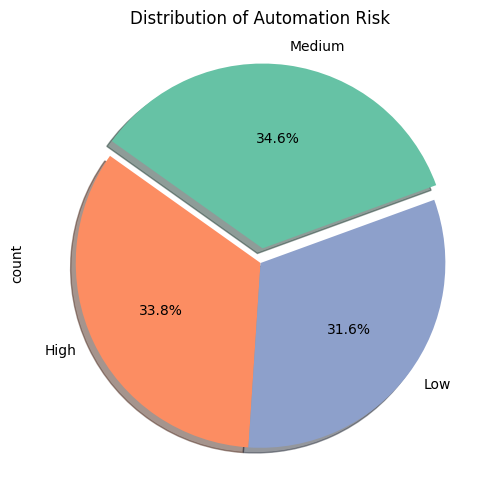

In [16]:
colors = plt.get_cmap('Set2').colors

df['Automation_Risk'].value_counts().plot(kind='pie', 
                                       startangle=20, 
                                       autopct='%1.1f%%', 
                                       title='Distribution of Automation Risk',
                                       explode=(0.08, 0, 0),
                                       shadow=True,
                                       colors=colors,
                                       figsize=(10, 6))

In [20]:
df.groupby(['Automation_Risk', 'AI_Adoption_Level']).size().unstack()

AI_Adoption_Level,High,Low,Medium
Automation_Risk,,,
High,48,53,68
Low,43,61,54
Medium,56,60,57


In [22]:
df.groupby(['Automation_Risk', 'Job_Title']).size().unstack()

Job_Title,AI Researcher,Cybersecurity Analyst,Data Scientist,HR Manager,Marketing Specialist,Operations Manager,Product Manager,Sales Manager,Software Engineer,UX Designer
Automation_Risk,,,,,,,,,,
High,20,23,17,15,17,10,16,20,15,16
Low,15,21,25,16,10,18,12,18,13,10
Medium,16,11,20,26,21,16,11,11,13,28


In [24]:
df.groupby(['Automation_Risk', 'Industry']).size().unstack()

Industry,Education,Energy,Entertainment,Finance,Healthcare,Manufacturing,Retail,Technology,Telecommunications,Transportation
Automation_Risk,,,,,,,,,,
High,22,17,18,17,11,19,11,17,18,19
Low,16,18,17,16,14,16,16,17,17,11
Medium,19,14,12,20,17,23,19,22,18,9


In [26]:
df.groupby(['Automation_Risk', 'Location']).size().unstack()

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Automation_Risk,,,,,,,,,,
High,12,14,20,17,12,24,23,17,15,15
Low,16,20,17,10,16,17,12,20,15,15
Medium,20,17,9,22,18,21,19,15,21,11


In [30]:
df.Required_Skills.unique()

array(['UX/UI Design', 'Marketing', 'Project Management', 'JavaScript',
       'Cybersecurity', 'Sales', 'Machine Learning', 'Python',
       'Data Analysis', 'Communication'], dtype=object)

In [36]:
df.Required_Skills.value_counts()

Required_Skills
Python                60
Project Management    60
Cybersecurity         58
Machine Learning      52
Data Analysis         49
UX/UI Design          49
Sales                 49
Marketing             45
JavaScript            44
Communication         34
Name: count, dtype: int64

In [37]:
df.groupby(['Job_Title','Required_Skills']).size().unstack()

Required_Skills,Communication,Cybersecurity,Data Analysis,JavaScript,Machine Learning,Marketing,Project Management,Python,Sales,UX/UI Design
Job_Title,,,,,,,,,,
AI Researcher,4,5,4,9,2,4,3,9,7,4
Cybersecurity Analyst,3,10,3,4,7,5,5,5,4,9
Data Scientist,2,9,7,3,6,5,7,9,8,6
HR Manager,4,6,7,5,10,5,6,3,6,5
Marketing Specialist,6,3,4,4,1,8,2,10,6,4
Operations Manager,5,5,3,5,4,1,5,5,5,6
Product Manager,2,2,2,5,7,3,6,5,2,5
Sales Manager,1,8,9,2,7,2,7,6,4,3
Software Engineer,4,2,5,3,6,5,5,3,4,4


In [39]:
pd.crosstab(index=df['Industry'], columns=[df['Required_Skills']])

Required_Skills,Communication,Cybersecurity,Data Analysis,JavaScript,Machine Learning,Marketing,Project Management,Python,Sales,UX/UI Design
Industry,,,,,,,,,,
Education,5,9,9,4,7,3,10,4,4,2
Energy,2,5,6,4,6,3,3,5,6,9
Entertainment,3,8,2,6,4,7,6,4,4,3
Finance,2,8,2,6,8,1,6,9,5,6
Healthcare,5,2,5,5,5,3,4,8,2,3
Manufacturing,7,7,4,3,6,8,8,8,4,3
Retail,3,9,5,5,6,3,5,3,2,5
Technology,1,4,5,5,4,10,4,6,9,8
Telecommunications,3,4,7,3,5,6,9,5,6,5


# Salary Across Different Industries with AI Adoption Level

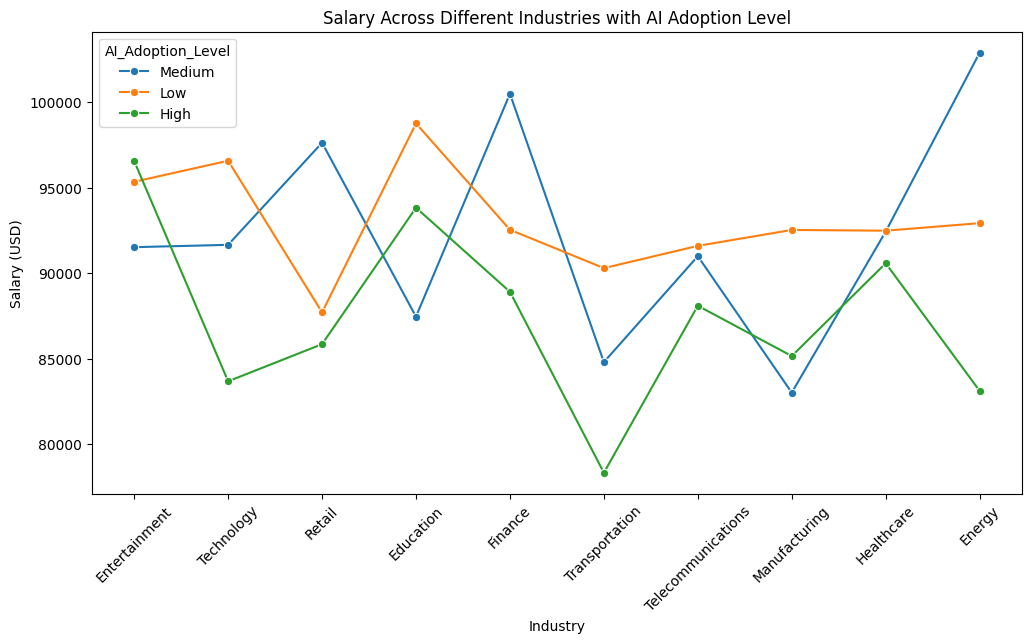

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Industry', y='Salary_USD', hue='AI_Adoption_Level', marker='o' , ci=None)
plt.title('Salary Across Different Industries with AI Adoption Level')
plt.xlabel('Industry')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

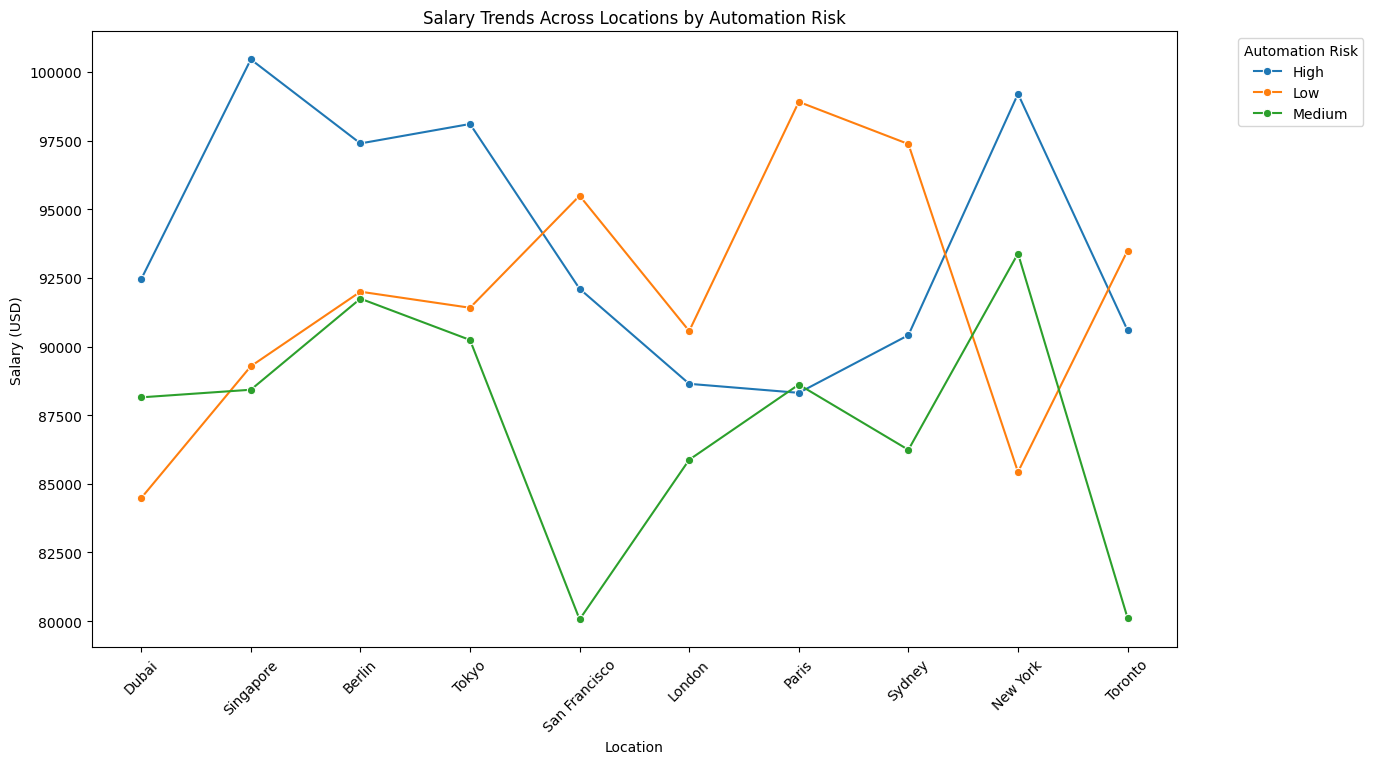

In [55]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, 
             x='Location', 
             y='Salary_USD', 
             hue='Automation_Risk', 
             marker='o', ci=None)
plt.title('Salary Trends Across Locations by Automation Risk')
plt.xlabel('Location')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Automation Risk', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')
plt.show()

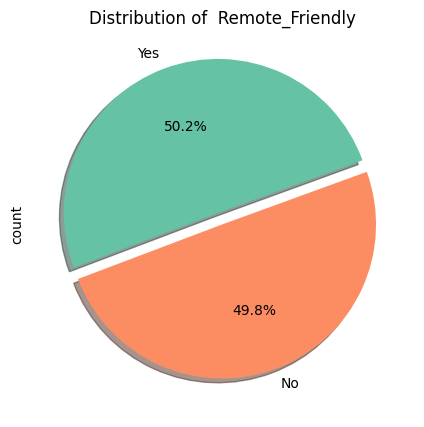

In [48]:
colors = plt.get_cmap('Set2').colors

df["Remote_Friendly"].value_counts().plot(kind='pie', 
                                          startangle=20,
                                          autopct='%1.1f%%', 
                                          figsize=(5,5), 
                                          title='Distribution of  Remote_Friendly', 
                                          explode=(0.08,0 ), 
                                          shadow=True, 
                                          colors=colors)
plt.show()

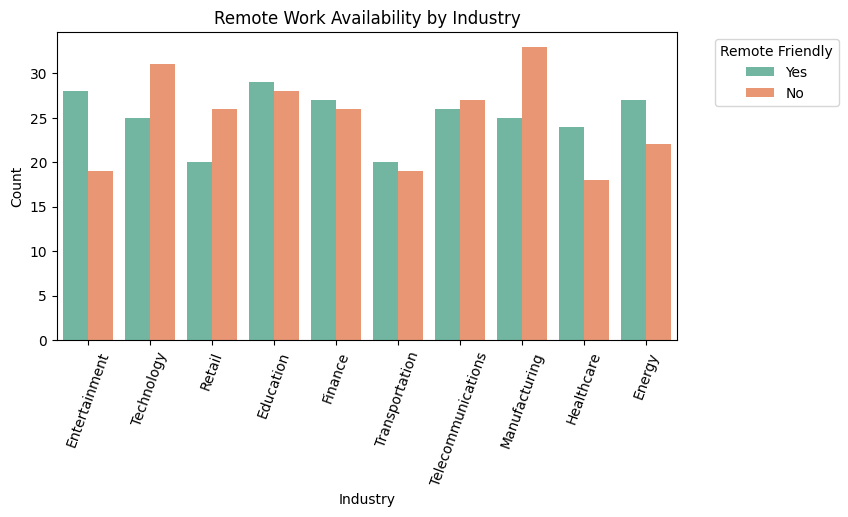

In [53]:
plt.figure(figsize=(8, 4))
colors = plt.get_cmap('Set2').colors
sns.countplot(data=df, x='Industry', hue='Remote_Friendly', palette=colors)
plt.title('Remote Work Availability by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.legend(title='Remote Friendly', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

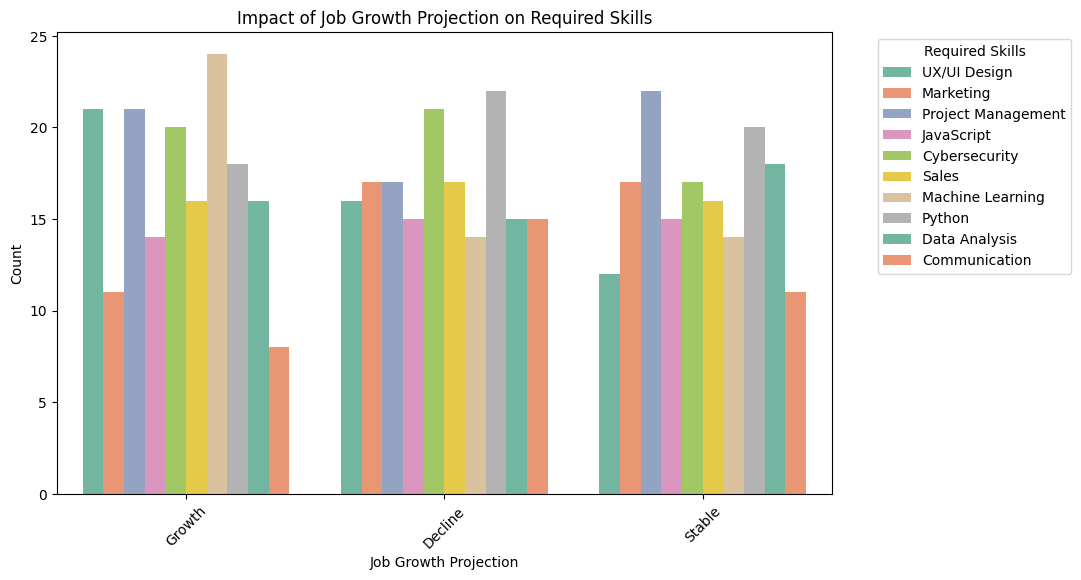

In [54]:
plt.figure(figsize=(10, 6))
colors = plt.get_cmap('Set2').colors
sns.countplot(data=df, x='Job_Growth_Projection', hue='Required_Skills', palette=colors)
plt.title('Impact of Job Growth Projection on Required Skills')
plt.xlabel('Job Growth Projection')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Required Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()